In [286]:
import Pkg;
Pkg.activate("../")
Pkg.update()
Pkg.instantiate()
#Pkg.add(url = "https://github.com/RalphAS/Pseudospectra.jl")

  Activating project at `~/Code/ExperimentsPseudospectra.jl/notebook`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/RalphAS/Pseudospectra.jl`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Manifest-v1.11.toml`


In [287]:
using Pseudospectra, Plots

In [288]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


# Our example

We start by defining the dynamic, a perturbation of the doubling map
$$
T(z) = i z^2 \cdot exp\left[\left(\frac{1}{2}-\frac{\pi}{16}\right)\left(z-\frac{1}{z}\right)\right].
$$

In [289]:
b = 5/64+1/128+1/256
T(z) = im*z^2*exp((1/2-π*b)*(z-1/z))

T (generic function with 1 method)

# Non rigorous exploration of the Pseudospectrum

We fix the truncation size for the Galerkin approximation.

In [290]:
K = 128
N = 2*K+1

257

We start by writing the Blashke product as an interval map

In [291]:
S(x) = 2 * x + (1 / (2 * pi) - b) * sin(2 * π * x) + 0.25

S (generic function with 1 method)

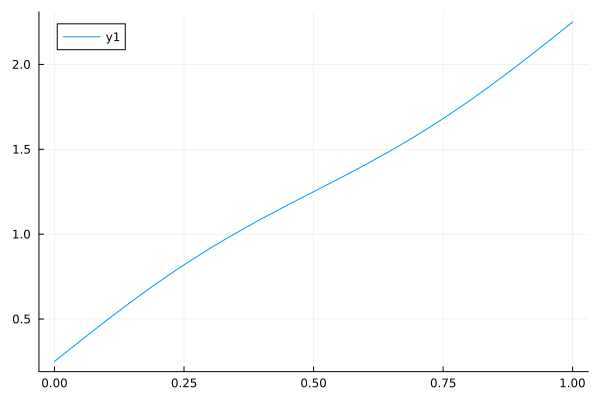

In [292]:
using Plots
plot(S, 0, 1)

In [293]:
using RigorousInvariantMeasures
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 65536)
P = DiscretizedOperator(FourierBasis, S)

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/GenericAssembler.jl:145
┌ Info: 257
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 128
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


NonIntegralPreservingDiscretizedOperator{Adjoint{Complex{Interval{Float64}}, Matrix{Complex{Interval{Float64}}}}, Vector{Float64}, Adjoint{Complex{Interval{Float64}}, Vector{Complex{Interval{Float64}}}}}(Complex{Interval{Float64}}[[0.999999, 1.00001] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im … [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im; [-2.52241e-14, 2.523e-14] + [-0.0233346, -0.0233345]im [-2.52669e-14, 2.51873e-14] + [0.212626, 0.212627]im … [-2.52266e-14, 2.52275e-14] + [-9.27856e-05, -9.27855e-05]im [-2.52257e-14, 2.52285e-14] + [0.00170041, 0.00170042]im; … ; [-0.00144277, -0.00144276] + [-2.67363e-14, 2.67392e-14]im [0.000126466, 0.000126467] + [-2.67373e-14, 2.67382e-14]im … [-0.0889735, -0.0889734] + [-2.66986e-14, 2.67769e-14]im [0.0131252, 0.0131253] + [-2.67402e-14, 2.67353e-14]im; [-2.52241e-14, 2.523e-14] + [0.0233345, 0.0233346]im [-2.52257e-14, 

Computing pseudospectra... 100%|████████████████████| Time: 0:00:03


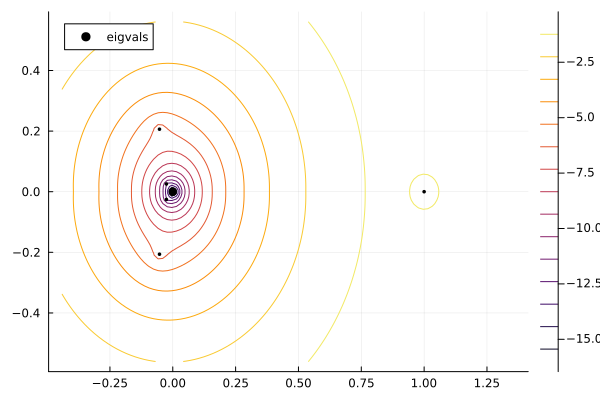

In [294]:
import IntervalArithmetic
midI = IntervalArithmetic.mid
radI = IntervalArithmetic.radius

midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))
spectralportrait(midP)

# Numerical oracle for the constants

In this section we do some numerical computations to narrow down the set of parameters. Later on, we will use self-validated numerical methods (Interval Arithmetic) to certify the 
numerical values we computed now. We do this since numerical computations are inexpensive, while self validated methods may be more time-consuming.

In [295]:
using Plots

In [296]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


Let $A_{r} = \{z \mid e^{-2\pi r}\leq |z| \leq e^{2\pi r}\}$.

We are interested in finding $\eta$, $\rho$ such that the closure $A_{\rho}$ is contained in $B_{\mu}(A_{\eta})$.
We are interested in maximizing $\alpha-\eta$, since it is the constant appearing in the main error term of our functional analytic treatment, i.e.:
$$
||Lf-L_Kf||_{\mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho-\alpha)}-1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\mathcal{A}_{\alpha}}.	
$$

For $\eta>1$ fix
$$
\rho_o(\eta):=\frac{1}{2\pi}\log\left(\min_{\theta \in [0,1]}|B_{\mu}(e^{2\pi\eta} e^{2\pi i \theta})|\right)
$$
where $_0$ stays for outer.
We would like to maximize this function.

In [297]:
ρ_o(η) = log(minimum(abs.(T.([exp(2 * π*(η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_o (generic function with 1 method)

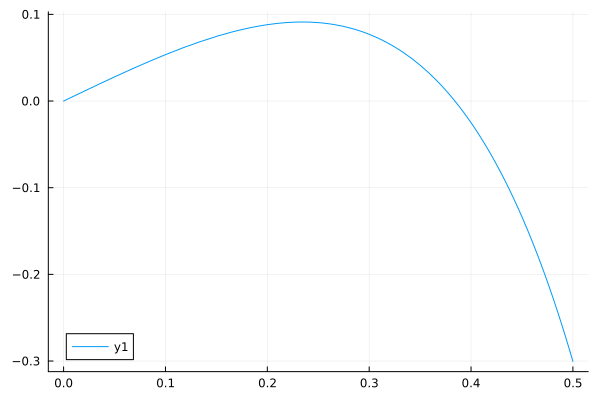

In [298]:
plot(η->ρ_o(η)-η, 0, 0.5)

Similarly, we would like to treat the image inside the circle; for $\eta>1$ we define 
$$
\rho_i(\eta) :=-\frac{1}{2\pi}\log\left(\max_{\theta \in [0, 1]}\left|B_{\mu}(e^{2\pi (-\eta + i \theta)})\right|\right)
$$

In [299]:
ρ_i(η) = -log(maximum(abs.(T.([exp(2 * π*(-η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_i (generic function with 1 method)

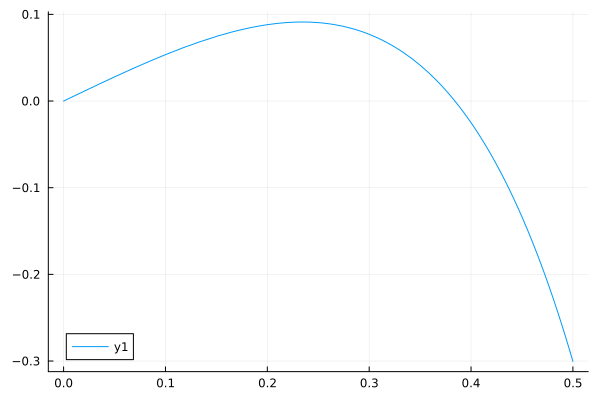

In [300]:
plot(η->ρ_i(η)-η, 0, 0.5)

We define now 
$$
\rho(\eta) = \min\{\rho_i(\eta),\rho_o(\eta)\}-\eta
$$
we have that our dynamic is expanding the annulus when this function is positive.

In [301]:
ρ(η) = min(ρ_i(η), ρ_o(η))

ρ (generic function with 1 method)

We plot now the function 
$$
    \eta \mapsto \rho(\eta)-\eta
$$
our dynamic is expanding the annulus when this function is positive.

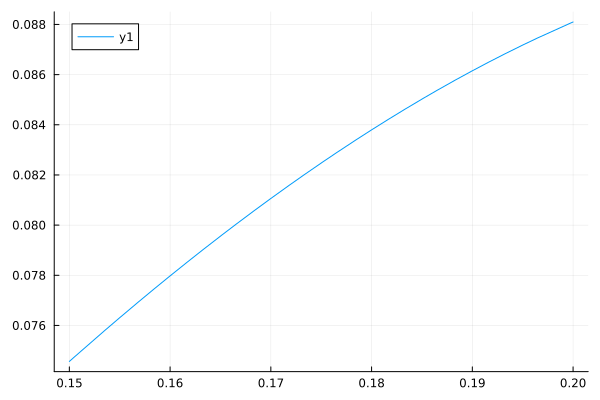

In [302]:
plot(η -> (ρ(η)-η), 0.15, 0.2)

From this non certified plot, we can see that the the difference $\rho(\eta)-\eta$ seems to have a maximum at  
$0.0460$.

We need now to be careful in choosing $\eta$ and $\rho$ in such a way that our computation is well behaved.

By our numerical exploration of the pseudospectrum, we want to isolate the eigenvalues outside of a circle of radius $0.5$.

By Lemma 3.10 and Lemma 3.13, we have that 
$$
\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}}\leq (1/\mu)^{\frac{\alpha}{\alpha-\eta}} \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)^{\frac{\alpha}{\alpha-\eta}} 
$$
and
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right).
$$

We refer to Proposition 2 in the paper, what we would like to control and make small is
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}};
$$
since $\rho>\alpha$ we have then that $\alpha-\eta$ is at most $0.046$.

To optimize this, we pass to the logarithm.

In [303]:
bound(η, ρ, α; K, μ) =  α/(α-η)*log2(1/μ)+(α/(α-η)+1)*log2(1+2/(exp(2*π*(ρ-α))-1))+log2(exp(-2*π*K*α)+exp(-2*π*K*(α-η)))

bound (generic function with 1 method)

In [304]:
bound_η_α(η, α; K, μ) = bound(η, ρ(η), α; K, μ)

bound_η_α (generic function with 1 method)

In [305]:
function bound_η(η; K, μ)
    η_eps = η+(ρ(η)-η)/100
    ρ_eps = ρ(η)-(ρ(η)-η)/100
    val, index = findmin([bound_η_α(η, α; K, μ) for α in LinRange(η_eps, ρ_eps, 100)])
    return val, LinRange(η_eps, ρ_eps, 100)[index]
end

bound_η (generic function with 1 method)

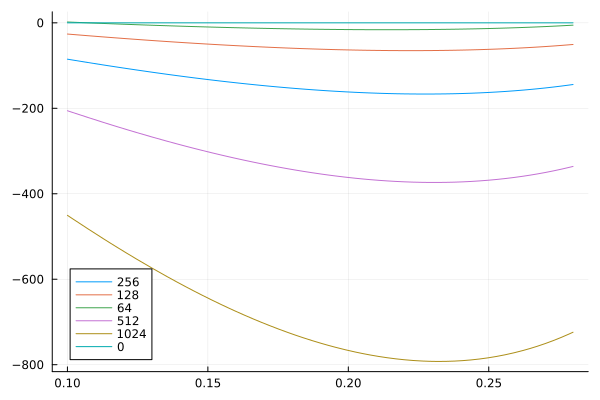

In [306]:
xmin = 0.1
xmax = 0.28
μ = 0.26
plot(η -> bound_η(η; K = 256, μ)[1], xmin, xmax, label = "256")
plot!(η -> bound_η(η; K = 128, μ)[1], xmin, xmax, label = "128")
plot!(η -> bound_η(η; K = 64, μ)[1], xmin, xmax, label = "64")
plot!(η -> bound_η(η; K = 512, μ)[1], xmin, xmax, label = "512")
plot!(η -> bound_η(η; K = 1024, μ)[1], xmin, xmax, label = "1024")
plot!(η -> 0, label = "0")

We choose a discretization size of $K=256$. For this discretization size we fix $\eta = 0.45175$

In [307]:
steps = 200
val, index = findmin([bound_η(η; K = 128, μ)[1] for η in LinRange(0.1, 0.28, steps)])

(-65.05863448848758, 136)

In [308]:
chosen_η = LinRange(0.1, 0.28, steps)[index]
chosen_α = bound_η(chosen_η; K = 128, μ)[2]

0.3083896613483371

By Proposition 3.14, we have that the eigenvalues of modulus bigger than $1/2$ of $\mathcal{L}$ are contained 
in $\sigma_\delta$ for all $\delta\geq 2^{-65}$, where 
$$
\sigma_{\delta} = \sigma(\mathcal{L_K})\cup \{z \in \mathbb{C} \mid z-\mathcal{L}_K\textrm{ is bounded invertible and } |(z-\mathcal{L}_K)^{-1}|> \delta^{-1}|\}
$$

# Certifying the constants

For the specific values of $\alpha$, $\rho$ and $\eta$ computed above, we will certify the value of the constants.

We will repeat the process above to estimate $\rho$, by enclosing the image of the annulus of radius $2\pi\eta$, by using now interval arithmetic to 
obtain guaranteed enclosures.

In [309]:
N = 32768
IΘ = [Interval(i, i+1)/N for i in 0:N-1];

Interval arithmetics....

In [310]:
ρ_o_c(η; IΘ) = log(minimum(abs.(T.([exp(2 * π*(η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_i_c(η; IΘ) = -log(maximum(abs.(T.([exp(2 * π*(-η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_c(η; IΘ) = min(ρ_i_c(η; IΘ), ρ_o_c(η; IΘ))

ρ_c (generic function with 1 method)

For the chosen $\eta$ we have that our oracle for $\rho$ returns

In [311]:
ρ(chosen_η)

0.3128920571730792

The certificate $\rho$ has some overestimates, but we can make this error small by taking a big partition $I\Theta$

In [312]:
ρ_c(chosen_η; IΘ)

[0.312891, 0.312893]

In [313]:
ρ_certified = Interval((ρ_c(chosen_η; IΘ)).lo) 

[0.312891, 0.312892]

After all computations, our chosen $\alpha$, $\eta$ and certified $\rho$ are

In [314]:
chosen_η, ρ_certified, chosen_α

(0.2221105527638191, [0.312891, 0.312892], 0.3083896613483371)

And the certified bound is 

In [315]:
δ = 2^bound(Interval(chosen_η), ρ_certified, Interval(chosen_α); K = 128, μ)

[2.60317e-20, 2.60318e-20]

# Establishing the enclosing curves

In [316]:
K = 256
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 65536)
P = DiscretizedOperator(FourierBasis, S)
midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/GenericAssembler.jl:145
┌ Info: 513
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 256
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:25


513×513 Matrix{ComplexF64}:
          1.0+0.0im          …           0.0+0.0im
  2.93406e-18-0.0233345im        1.38266e-18+0.00170041im
  -0.00144277-1.41579e-18im      0.000126467-4.2136e-19im
  2.65772e-18+0.000101517im      3.17501e-18-9.54677e-6im
   7.54783e-6+2.11639e-18im      -7.36707e-7+9.04993e-20im
  1.45821e-18-5.78706e-7im   …   2.37512e-18+5.78011e-8im
  -4.52505e-8-1.10881e-17im       4.59104e-9-9.65949e-20im
  8.23098e-18+3.58686e-9im       1.08955e-17-3.68074e-10im
  2.87185e-10+4.82235e-19im     -2.97251e-11-2.65676e-18im
 -1.85139e-17-2.31711e-11im     -2.71275e-19+2.41462e-12im
             ⋮               ⋱  
 -1.85139e-17+2.31711e-11im     -7.82174e-18-2.10411e-10im
  2.87185e-10-4.82235e-19im  …   -2.60805e-9+1.22264e-17im
  8.23098e-18-3.58686e-9im       5.14626e-18+3.2577e-8im
  -4.52505e-8+1.10881e-17im       4.11033e-7+6.64249e-18im
  1.45821e-18+5.78706e-7im      -1.22398e-18-5.25758e-6im
   7.54783e-6-2.11639e-18im      -6.85897e-5+5.51575e-18im
  2.65772e

In [317]:
using LinearAlgebra
F = schur(midP)
eigs = diag(F.T)

513-element Vector{ComplexF64}:
    -0.05286365883425767 - 0.20624984371147836im
    -0.05286365883329429 + 0.20624984371015145im
   -0.025395604833261986 + 0.02577012767788183im
   -0.025395634918751336 - 0.02577105393511056im
   -0.004888033806435467 + 0.021496248562341138im
     0.01047935402883531 + 0.019196617094386293im
   -0.018261290767673678 + 0.010435777020691867im
  -0.0048848801650577655 - 0.02150524426623559im
    0.010486286361319538 - 0.019199325126780745im
     0.02004283053111593 + 0.008116092187061089im
                         ⋮
 -1.2290784250619947e-15 + 4.623472902222801e-16im
  1.2563001454975262e-15 - 1.8824287501608266e-16im
  4.2472190394739916e-16 - 1.0200844883710624e-15im
   7.277015063280053e-16 + 9.783835868938861e-16im
  -4.178644319909222e-16 + 2.4270366819290136e-16im
   5.993947445017419e-16 - 2.0175668395725144e-16im
  3.3330902964116716e-16 + 1.0155719303808023e-17im
  4.2227383406951323e-16 + 1.9353130557136172e-16im
                     1.0 + 0.0im

The following are the eigenvalues of the Schur decomposition we are using to enclose the spectrum of the abstract operator.

In [318]:
λ_1 = 1.0
λ_2 = eigs[1]
λ_3 = eigs[2]

-0.05286365883329429 + 0.20624984371015145im

We check that the circle of radius $0.26$ effectively cuts off the reset of the eigenvalues of the Schur descomposition.

In [319]:
abs.(eigs)

513-element Vector{Float64}:
 0.21291680172394578
 0.21291680172242122
 0.036180605652497456
 0.036181286514618015
 0.022044989833220823
 0.02187068743158639
 0.021032835817528846
 0.0220530629432157
 0.021876386515497268
 0.021623737144349193
 ⋮
 1.3131636576332589e-15
 1.2703249330669009e-15
 1.104971067090879e-15
 1.2193374944679568e-15
 4.832346780575521e-16
 6.324395775548323e-16
 3.3346371298075927e-16
 4.645100183805755e-16
 1.0

We are going to enclose the eigenvalues by four circles:
* the circle $C_{\gamma_0}$ centered in $0$ with radius $0.26$
* the circle $C_{\gamma_1}$ centered at $\lambda_1$ with radius $0.01$
* the circle $C_{\gamma_2}$ centered at $\lambda_2$ with radius $0.01$
* the circle $C_{\gamma_3}$ centered at $1$ with radius $0.1$

This computation is quite expensive, but we ran an example of it in this notebook to show how it works.
In the directory *ExperimentsPseudospectra.jl/scripts/Arnold* the scripts that run these computations using parallelization can be found,
for local computation and computation on a slurm cluster.

This is the typical output of the computation, here certifying the eigenvalue at $1$

```┌ Info: Added 8 processes
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:17
AMD Ryzen 5 5600 6-Core Processor: 
          speed         user         nice          sys         idle          irq
#1-12  4441 MHz     134692 s        120 s     121729 s     627092 s          0 s
┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/nPayJ/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/nPayJ/src/BallArithmetic.jl:27
┌ Info: Schur decomposition errors
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:33
┌ Info: ("E_M", 4.362697431116958e-13)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:38
┌ Info: ("E_T", 5.447296963610192e-9)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:39
┌ Info: ("norm_Z", Ball{Float64, Float64}(1.000000000000006, 2.336908444533492e-12))
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:40
┌ Info: ("norm_Z_inv", Ball{Float64, Float64}(1.0000000000000058, 2.3373525337433425e-12))
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:41
┌ Info: ("Certifying ", 1.0, "radius", 0.1, "radius pearl", 0.049000000000000016)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/run_Arnold_one.jl:11
┌ Info: 13 svd need to be computed to certify the arc centered at 1.0, with radius 0.1, with pearls of size 0.049000000000000016
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:37
┌ Info: with start angle 0 and stop angle 6.283185307179586
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:38
┌ Info: Jobs submitted to the queue
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:42
┌ Info: The minimum singular value along the arc centered at 1.0, with radius 0.1, with pearls of size 0.049000000000000016 with start angle 0 and stop angle 6.283185307179586 is 0.050388243829828226, the maximum of the l2 pseudospectra is bounded by 19.84589904298336
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:81
┌ Info: ("Average time for certifying an SVD", 10.905107298384618)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:83
┌ Info: ("Total time for certifying the arc", 20.453904849)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:84
┌ Info: ("The norm of the resolvent for the discretized operator is", 898.9997063371694)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/cleaning.jl:10```